<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *X*: *Judul***

###**Tenggat Waktu: XX Bulan 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab1_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **XX Bulan 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = ""
KELAS = ""
NPM = ""

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya,  dari kelas  dengan NPM , menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   ()


# Exploratory Data Analysis

*Exploratory Data Analysis* (EDA) merupakan suatu proses menganalisis dataset untuk melihat karakteristik utama dari data. EDA adalah pemrosesan dasar yang dapat mempengaruhi keputusan-keputusan seorang data scientist dalam memproses data di tahap selanjutnya. Proses ini sering melibatkan dua hal, di antaranya *descriptive statistics* dan data *visualization*.

## Deskripsi Dataset Fuel Consumption

Tabel di bawah menunjukkan data rate penggunaan bahan bakar dan perkiraan emisi Karbon Dioksida pada mobil ringan di Kanada pada tahun 2022.
* `Make`: Nama brand mobil
* `Model`: Nama model mobil
* `Vehicle Class`: Nama kelas atau tipe kendaraan
* `Engine Size(L)`: Ukuran mesin
* `Cylinders`: Jumlah *cylinder* yang ada pada mesin
* `Transmission`: Jenis transmisi kendaraan
* `Fuel Type`: Tipe bahan bakar yang digunakan
* `Fuel Consumption (City (L/100 km)`: Rata-rata konsumsi bahan bakar dalam perkotaan
* `Fuel Consumption(Hwy (L/100 km))`: Rata-rata konsumsi bahan bakar dalam jalan raya
* `Fuel Consumption(Comb (L/100 km))`: Rata-rata konsumsi bahan bakar dalam perkotaan dan jalan raya
* `CO2 Emissions(g/km)`: emisi gas buang karbon dioksida (dalam gram per kilometer) untuk gabungan mengemudi di kota dan jalan raya
* `CO2 Rating`: emisi knalpot karbon dioksida dinilai pada skala dari 1 (terburuk) hingga 10 (terbaik)
* `Smog Rating`: emisi knalpot polutan pembentuk asap yang dinilai pada skala dari 1 (terburuk) hingga 10 (terbaik)


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [4]:
df = pd.read_csv('co2.csv')

In [8]:
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df.head()

Jumlah data: 946
Jumlah atribut: 15


,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [9]:
# Melihat kolom-kolom pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [10]:
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [11]:
df.describe(include=['object'])

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,946,946,946,946,946
unique,39,715,14,23,4
top,Ford,Mustang,SUV: Small,AS8,Z
freq,89,5,197,212,458


# Descriptive Statistics
Ada banyak jenis measures yang dapat diterapkan untuk *descriptive statistics*.

Mengingat materi dari StatProb, ada
1. *Central tendency* (mean, median, mode)
2. *Dispersion* atau *variability* (variance, standard deviation)
3. Minimum, maximum
4. Range
5. Quantile
6. Percentile

**Central tendency sering dipakai untuk melihat distribusi data.**
Pada biasanya, `mean` lebih cocok untuk distribusi normal (yang terlihat simetris di tengah), sementara median lebih baik untuk distribusi bersifat *skewed* (berat sebelah). Tentunya, ini tidak berlaku untuk data kategorik yang hanya bisa menggunakan `mode`.

Terkadang central tendency saja tidak cukup untuk melihat distribusi data. Central tendency tidak bisa menggambarkan seberapa besar data tersebar. **Measure of dispersion merupakan ukuran yang biasa digunakan untuk melihat keragaman data atau seberapa besar data tersebar.** Terdapat beberapa ukuran untuk menentukan dispersi data pengamatan, seperti jangkauan/rentang (`range`) dan simpangan baku (`standard deviation`).

Secara umum, berikut adalah contoh penggunaan descriptive statistics (1), (2), (3) dari atribut `Engine Size(L)`:

In [16]:
engine_arr = df['Engine Size(L)']

price_stats = [
    ['Mean', np.mean(engine_arr)],
    ['Median', np.median(engine_arr)],
    ['Mode', scp.mode(engine_arr)[0][0]],
    ['Standard Deviation', np.std(engine_arr)],
    ['Variance', np.var(engine_arr)],
    ['Minimum', np.min(engine_arr)],
    ['Maximum', np.max(engine_arr)],
]

pd.DataFrame(price_stats, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,3.198732
1,Median,3.000000
2,Mode,2.000000
3,Standard Deviation,1.374088
4,Variance,1.888117
5,Minimum,1.200000
6,Maximum,8.000000


Pada hasil diatas, bisa kita lihat bahwa `mean` > `median` > `mode`. Data tersebar sebesar 1.37 dari nilai `mean`. dengan nilai maksimum 8 dan minimum 1.2. Kemungkinan data cenderung padat di nilai yang rendah atau padat ke kiri.

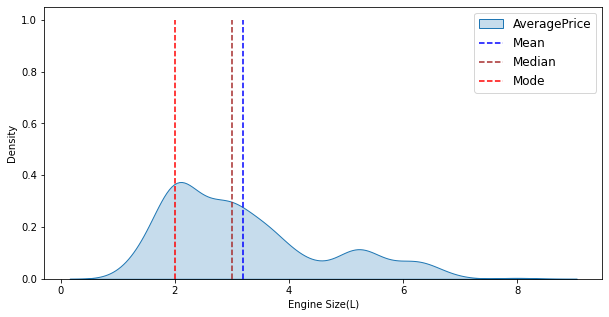

In [21]:
plt.figure(figsize=(10,5))
sns.kdeplot(engine_arr, shade=True)
plt.vlines(x=np.mean(engine_arr), ymin=0, ymax=1, color='blue', linestyle='--')
plt.vlines(x=np.median(engine_arr), ymin=0, ymax=1, color='brown', linestyle='--')
plt.vlines(x=scp.mode(engine_arr)[0][0], ymin=0, ymax=1, color='red', linestyle='--')
plt.legend(['AveragePrice', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Bisa dilihat bahwa distribusi bersifat `left skewed` karena lebih berat di kiri. Berdasarkan visualisasi, `median`, `mean`, `modus` tidak selalu sama. Pada kasus ini, median dapat menjadi pengukuran yang tepat untuk menggambarkan central tendency dari data

Selain membuat visualisasi, kita juga bisa melihat nilai skweness dari atribut numerik dengan menggunakan fungsi `.skew()` berikut:

In [22]:
df.skew()

Model Year                           0.000000
Engine Size(L)                       0.940105
Cylinders                            1.250016
Fuel Consumption (City (L/100 km)    0.734959
Fuel Consumption(Hwy (L/100 km))     0.808880
Fuel Consumption(Comb (L/100 km))    0.721713
Fuel Consumption(Comb (mpg))         1.449487
CO2 Emissions(g/km)                  0.553344
CO2 Rating                           0.448032
Smog Rating                         -0.692024
dtype: float64

Interpretasi nilai *skewness*:
*   Jika nilainya positif maka right skewed (buntut kanan > buntut kiri)
*   Jika nilainya negatif maka left skewed (buntut kiri > buntut kanan)
*   Jika skewness = 0, data simetris

Dari hasil tersebut, didapati bahwa AveragePrice memiliki karakteristik right skewed dengan tingkat asimetris yang tidak terlalu tinggi. Sementara atribut numerik lain memiliki asimetris yang sangat tinggi ke kanan.


# Correlation

Korelasi merupakan pengukuran dependensi antar atribut dalam data. Korelasi sering digunakan untuk mengukur apakah suatu atribut memiliki hubungan yang kuat secara linier atau tidak. 

Terdapat beberapa jenis korelasi yang dapat digunakan pada jenis data yang berbeda. ***Pearson correlation*** umum digunakan untuk mengukur korelasi pada atribut numerik.

In [23]:
df.corr(method='pearson')

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Model Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size(L),NaN,1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,NaN,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),NaN,0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),NaN,0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),NaN,0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),NaN,-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),NaN,0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,NaN,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,NaN,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


Diatas kita bisa melihat nilai korelasi antar atribut. Namun visualiasi tersebut kurang nyaman untuk dilihat. Untuk itu, kita bisa menggunakan `heat map` untuk melihat korelasi antar atribut

<AxesSubplot:title={'center':'Fuel Consumption Correlation Matrix'}>

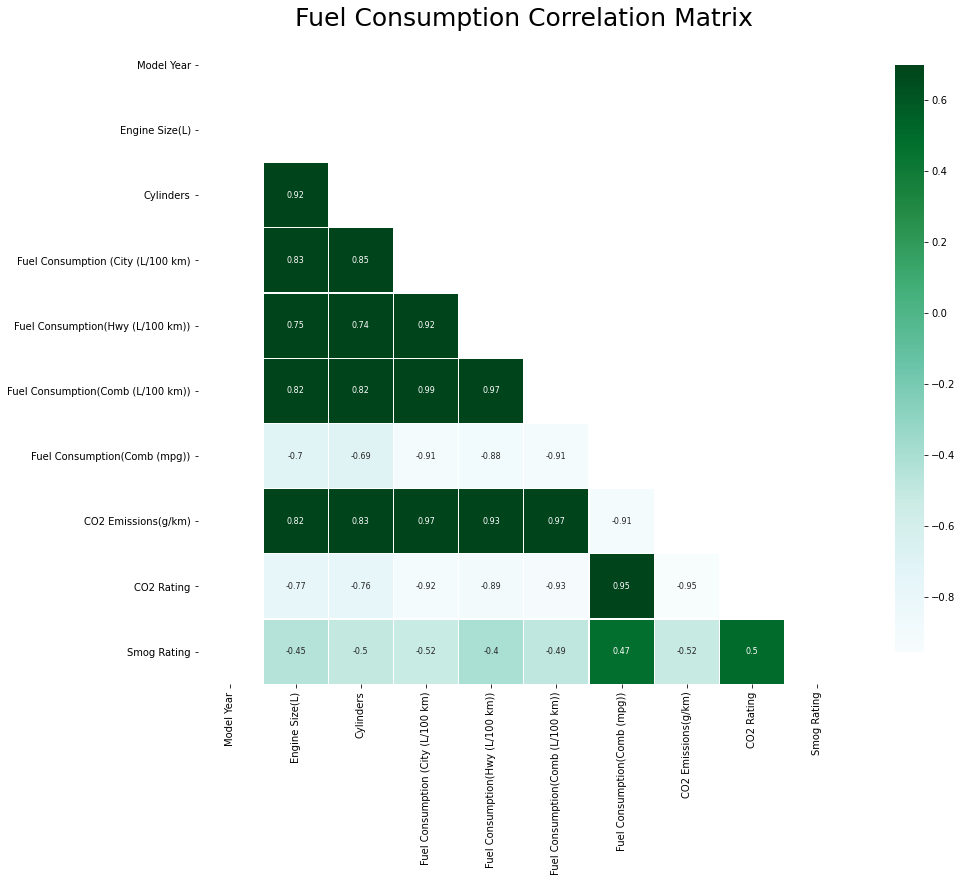

In [24]:
mask = np.zeros_like(df[df.columns].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16,12))
plt.title("Fuel Consumption Correlation Matrix", fontsize = 25)

sns.heatmap(df[df.columns].corr(),linewidths=.25,vmax=.7,square=True,cmap="BuGn",linecolor='w',annot=True,
           annot_kws={"size":8}, mask=mask, cbar_kws={"shrink":.9})

Dari heatmap diatas, kita bisa menentukan pasangan atribut apa saja yang memiliki relasi yang tinggi (warna hijau gelap). Untuk membuktikan, dibawah terdapat 2 scatterplot yang menunjukkan hubungan linear dengan `Cylinders`, yakni
* `Engine Size(L)`: 0.92
* `CO2 Rating`: -0.77

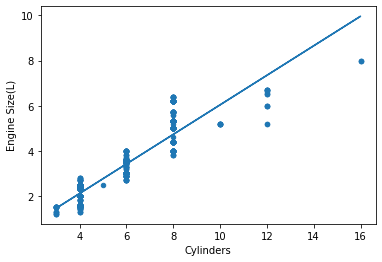

In [30]:
w = df["Cylinders"]
z = df["Engine Size(L)"]
df.plot.scatter(x="Cylinders", y="Engine Size(L)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

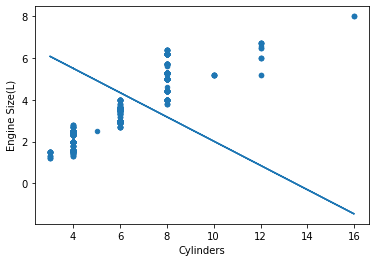

In [31]:
w = df["Cylinders"]
z = df["CO2 Rating"]
df.plot.scatter(x="Cylinders", y="Engine Size(L)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()